In [2]:
import numpy as np
import seaborn as sns 
import pandas as pd
from tqdm import tqdm
import cv2
from tensorflow.keras.applications import Xception
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [3]:
TRAIN_PATH = '../Steel Defect Detection Dataset'
TRAIN_IMAGES = '../Steel Defect Detection Dataset/train_images'
TEST_IMAGES = '../Steel Defect Detection Dataset/train_images'

In [4]:
df_train = pd.read_csv(TRAIN_PATH + '/train.csv')
df_submission = pd.read_csv(TRAIN_PATH + '/sample_submission.csv')

In [5]:
df_train.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [6]:
df_train.shape

(7095, 3)

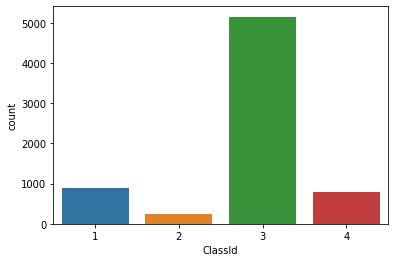

In [7]:
sns.countplot(x= df_train['ClassId'])
plt.show()

In [8]:
img = cv2.imread(TRAIN_IMAGES + '/0002cc93b.jpg')

In [9]:
img

array([[[ 70,  70,  70],
        [ 70,  70,  70],
        [ 68,  68,  68],
        ...,
        [ 48,  48,  48],
        [ 48,  48,  48],
        [ 50,  50,  50]],

       [[ 66,  66,  66],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 48,  48,  48],
        [ 49,  49,  49],
        [ 51,  51,  51]],

       [[ 61,  61,  61],
        [ 64,  64,  64],
        [ 65,  65,  65],
        ...,
        [ 49,  49,  49],
        [ 51,  51,  51],
        [ 54,  54,  54]],

       ...,

       [[155, 155, 155],
        [133, 133, 133],
        [131, 131, 131],
        ...,
        [ 51,  51,  51],
        [ 51,  51,  51],
        [ 50,  50,  50]],

       [[160, 160, 160],
        [111, 111, 111],
        [100, 100, 100],
        ...,
        [ 55,  55,  55],
        [ 54,  54,  54],
        [ 48,  48,  48]],

       [[155, 155, 155],
        [114, 114, 114],
        [ 98,  98,  98],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 50,  50,  50]]

In [10]:
df_train.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [11]:
len(df_train)

7095

In [12]:
from imutils import paths

In [13]:
for random_image in paths.list_images(TRAIN_IMAGES + '{0002cc93b.jpg}'):
    print(random_image)
    plt.imshow(random_image)
    plt.show()

The class ID for this image is: 1


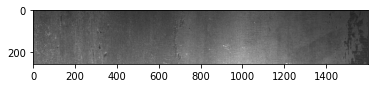

The class ID for this image is: 3


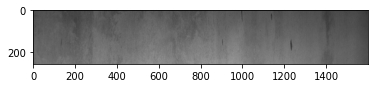

The class ID for this image is: 1


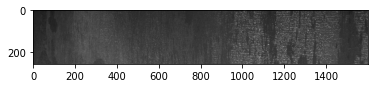

The class ID for this image is: 4


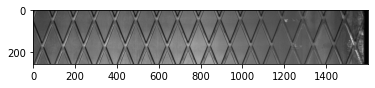

The class ID for this image is: 3


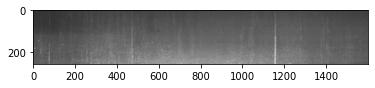

The class ID for this image is: 3


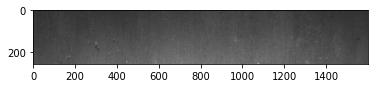

The class ID for this image is: 4


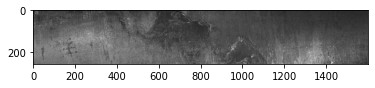

The class ID for this image is: 4


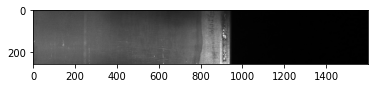

The class ID for this image is: 1


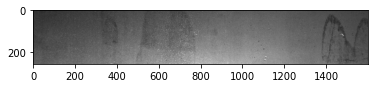

In [14]:
count = 0 
for image_path in paths.list_images(TRAIN_IMAGES):
    print("The class ID for this image is: {}".format(df_train['ClassId'].iloc[count]))
    count = count + 1
    random_image = plt.imread(image_path)
    plt.imshow(random_image)
    plt.show()
    if count == 9:
        break
        

In [15]:
images = []
classID = []
for image_id, class_id, encoded_bits in tqdm(df_train.values):
    img = cv2.imread(TRAIN_IMAGES + '/{}'.format(image_id), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img / 255
    images.append(img)
    classID.append(class_id)

100%|█████████████████████████████████████████████████████████████████████████████| 7095/7095 [00:48<00:00, 146.09it/s]


In [16]:
from sklearn.preprocessing import LabelBinarizer

In [17]:
images = np.array(images, dtype = np.float32)
classID = np.array(classID, dtype = np.float32)

In [18]:
lb = LabelBinarizer()
classID = lb.fit_transform(classID)

In [19]:
images[0]

array([[[0.25882354, 0.25882354, 0.25882354],
        [0.46666667, 0.46666667, 0.46666667],
        [0.23137255, 0.23137255, 0.23137255],
        ...,
        [0.18431373, 0.18431373, 0.18431373],
        [0.21568628, 0.21568628, 0.21568628],
        [0.2       , 0.2       , 0.2       ]],

       [[0.25882354, 0.25882354, 0.25882354],
        [0.30588236, 0.30588236, 0.30588236],
        [0.24705882, 0.24705882, 0.24705882],
        ...,
        [0.20392157, 0.20392157, 0.20392157],
        [0.22352941, 0.22352941, 0.22352941],
        [0.19215687, 0.19215687, 0.19215687]],

       [[0.24705882, 0.24705882, 0.24705882],
        [0.24313726, 0.24313726, 0.24313726],
        [0.23529412, 0.23529412, 0.23529412],
        ...,
        [0.20392157, 0.20392157, 0.20392157],
        [0.21960784, 0.21960784, 0.21960784],
        [0.19215687, 0.19215687, 0.19215687]],

       ...,

       [[0.49411765, 0.49411765, 0.49411765],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        [0.44313726, 0

In [20]:
classID[0]

array([1, 0, 0, 0])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_cv, y_train, y_cv = train_test_split(images, classID, test_size = 0.2, 
                                                stratify = classID, random_state = 101)

In [23]:
len(X_train)

5676

In [24]:
len(X_cv)

1419

In [25]:
type(X_train)

numpy.ndarray

In [26]:
lb.classes_

array([1., 2., 3., 4.], dtype=float32)

In [27]:
from tensorflow.keras.applications import Xception, VGG19, ResNet152, InceptionV3
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras import Model 
from tensorflow.keras.optimizers import Adam

In [28]:
headmodel = VGG19(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (224, 224, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [29]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [47]:
final_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [49]:
MODEL_SAVE_PATH = "Models/"

In [51]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "VGG19_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [52]:
fitted_model = final_model.fit(X_train, y_train, epochs = 10, validation_data = (X_cv, y_cv),
                               callbacks = checkpoint, batch_size = 64)

Epoch 1/10
89/89 [==============================] - 18s 198ms/step - loss: 0.5331 - accuracy: 0.7815 - val_loss: 0.5026 - val_accuracy: 0.8048
Epoch 2/10
89/89 [==============================] - 18s 197ms/step - loss: 0.5214 - accuracy: 0.7875 - val_loss: 0.5017 - val_accuracy: 0.8048
Epoch 3/10
89/89 [==============================] - 18s 198ms/step - loss: 0.5132 - accuracy: 0.7933 - val_loss: 0.4917 - val_accuracy: 0.7984
Epoch 4/10
89/89 [==============================] - 18s 199ms/step - loss: 0.5036 - accuracy: 0.7939 - val_loss: 0.4957 - val_accuracy: 0.7999
Epoch 5/10
89/89 [==============================] - 18s 203ms/step - loss: 0.5089 - accuracy: 0.7895 - val_loss: 0.5964 - val_accuracy: 0.7590
Epoch 6/10
89/89 [==============================] - 19s 213ms/step - loss: 0.5058 - accuracy: 0.7898 - val_loss: 0.5006 - val_accuracy: 0.7865
Epoch 7/10
89/89 [==============================] - 20s 225ms/step - loss: 0.4971 - accuracy: 0.7949 - val_loss: 0.4817 - val_accuracy: 0.8104

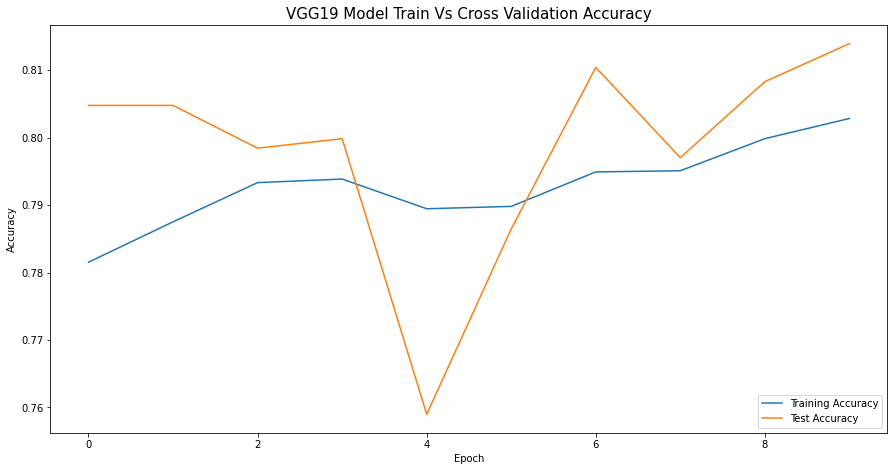

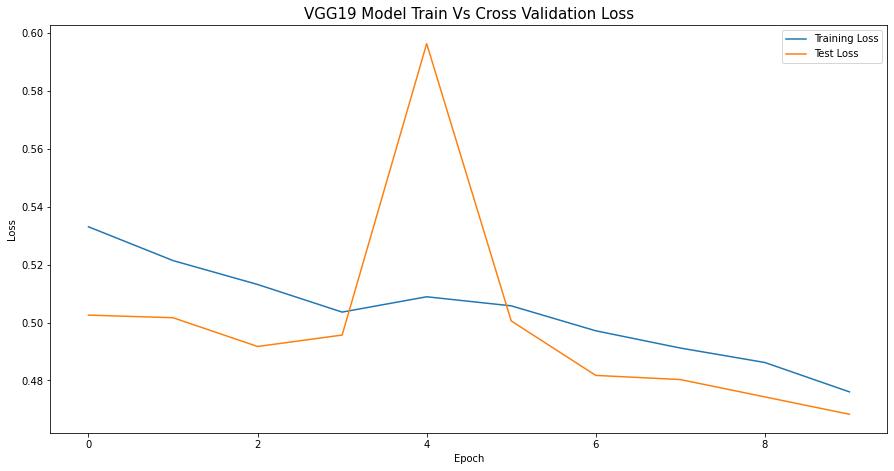

In [53]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('VGG19 Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/VGG19_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('VGG19 Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/VGG19_Loss_plot.jpg")
plt.show()


In [54]:
## AveragePooling2D layer size (4, 4) and dropout rate 0.1 
headmodel = VGG19(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (224, 224, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (4, 4))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.1)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [55]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [56]:
final_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [57]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "VGG19_weights_modified.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [ ]:
final_model.fit(X_train, y_train, epochs = 10, validation_data = (X_cv, y_cv), 
                callbacks = checkpoint, batch_size = 64)

Epoch 1/10
89/89 [==============================] - 20s 223ms/step - loss: 0.8035 - accuracy: 0.7199 - val_loss: 0.6955 - val_accuracy: 0.7393
Epoch 2/10
89/89 [==============================] - 20s 229ms/step - loss: 0.6985 - accuracy: 0.7373 - val_loss: 0.6540 - val_accuracy: 0.7435
Epoch 3/10
89/89 [==============================] - 22s 242ms/step - loss: 0.6647 - accuracy: 0.7442 - val_loss: 0.6406 - val_accuracy: 0.7541
Epoch 4/10
89/89 [==============================] - 21s 234ms/step - loss: 0.6369 - accuracy: 0.7489 - val_loss: 0.5846 - val_accuracy: 0.7674
Epoch 5/10
89/89 [==============================] - 20s 230ms/step - loss: 0.6114 - accuracy: 0.7555 - val_loss: 0.5685 - val_accuracy: 0.780110s - loss: 0.6022 - accura - ETA: 9s - loss: 0.6 - E
Epoch 6/10
89/89 [==============================] - 21s 240ms/step - loss: 0.6013 - accuracy: 0.7607 - val_loss: 0.5556 - val_accuracy: 0.7710
Epoch 7/10
42/89 [=============>................] - ETA: 8s - loss: 0.5912 - accuracy: 0.

In [ ]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('VGG19 Modified Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/VGG19_modified_Accuracy_plot.jpg", fontsize = 15)
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('VGG19 Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/VGG19_modified_Loss_plot.jpg")
plt.show()


In [86]:
images = []
classID = []
for image_id, class_id, encoded_bits in tqdm(df_train.values):
    img = cv2.imread(TRAIN_IMAGES + '/{}'.format(image_id), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))
    img = img / 255
    images.append(img)
    classID.append(class_id)

100%|█████████████████████████████████████████████████████████████████████████████| 7095/7095 [01:02<00:00, 114.07it/s]


In [87]:
images = np.array(images, dtype = np.float32)
classID = np.array(classID, dtype = np.float32)

In [88]:
lb = LabelBinarizer()
classID = lb.fit_transform(classID)

In [89]:
X_train, X_cv, y_train, y_cv = train_test_split(images, classID, test_size = 0.2, 
                                                stratify = classID, random_state = 101)

In [91]:
headmodel = Xception(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (299, 299, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [92]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [ ]:
final_model.summary()

In [93]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               epochs = 10, batch_size = 64)

Epoch 1/10
89/89 [==============================] - 29s 331ms/step - loss: 0.5635 - accuracy: 0.7933 - val_loss: 0.4210 - val_accuracy: 0.8224
Epoch 2/10
89/89 [==============================] - 27s 308ms/step - loss: 0.3725 - accuracy: 0.8508 - val_loss: 0.3980 - val_accuracy: 0.8245
Epoch 3/10
89/89 [==============================] - 29s 325ms/step - loss: 0.3349 - accuracy: 0.8649 - val_loss: 0.3976 - val_accuracy: 0.8266
Epoch 4/10
89/89 [==============================] - 31s 346ms/step - loss: 0.2990 - accuracy: 0.8768 - val_loss: 0.3749 - val_accuracy: 0.8337
Epoch 5/10
89/89 [==============================] - 32s 355ms/step - loss: 0.2875 - accuracy: 0.8807 - val_loss: 0.3760 - val_accuracy: 0.8464
Epoch 6/10
89/89 [==============================] - 33s 372ms/step - loss: 0.2635 - accuracy: 0.8895 - val_loss: 0.4143 - val_accuracy: 0.8280
Epoch 7/10
89/89 [==============================] - 33s 369ms/step - loss: 0.2571 - accuracy: 0.8962 - val_loss: 0.4007 - val_accuracy: 0.8302

In [104]:
headmodel = InceptionV3(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (299, 299, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dense(256, activation = 'relu')(model)
model = Dropout(0.1)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [105]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [106]:
from tensorflow.keras.callbacks import EarlyStopping

In [111]:
early_stopping = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 2, 
                               verbose = 1, mode = 'auto', restore_best_weights = True)

In [112]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               epochs = 10, batch_size = 64, callbacks = early_stopping)

Epoch 1/10
89/89 [==============================] - 15s 173ms/step - loss: 0.3054 - accuracy: 0.8663 - val_loss: 0.4542 - val_accuracy: 0.8175
Epoch 2/10
89/89 [==============================] - 16s 175ms/step - loss: 0.2860 - accuracy: 0.8800 - val_loss: 0.4399 - val_accuracy: 0.8316
Epoch 3/10
89/89 [==============================] - 16s 177ms/step - loss: 0.2650 - accuracy: 0.8797 - val_loss: 0.4265 - val_accuracy: 0.8196
Epoch 00003: early stopping


In [113]:
from tensorflow.keras.callbacks import ModelCheckpoint